# PCA Lab II

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics


%matplotlib inline


/Users/winston/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Step 1: Setup the Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [9]:
airports = pd.read_csv('./assets/datasets/airport_operations.csv')

In [23]:
airports.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
11,ANC,2004,16503,15511,0.7109,0.6770,0.6502,21.45,12.41,2.92,23.05,4.03,1.08,5.93,22.62
22,ATL,2004,477323,473249,0.7596,0.5757,0.7370,13.59,20.45,8.73,21.36,5.00,2.79,4.69,15.31
33,AUS,2004,14094,14052,0.7845,0.7658,0.7486,12.05,11.00,2.33,13.73,2.85,0.82,3.26,13.95
44,BDL,2004,52897,52093,0.8222,0.7719,0.7680,10.26,13.58,3.95,13.10,2.95,0.89,3.48,12.95


## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data.

**NB**: you've already done Steps 2-6 in an earlier lab. Use this EDA as a chance to sharpen your intuition about the results.

## Step 3: Define the Variables

Next, let's define the x and y variables: Airport is going to be our target variable

In [45]:
x = airports.ix[:,2:14].values
y = airports.ix[:,0].values

## Step 4: Covariance Matrix

Then, standardize the features for analysis

In [1]:
xStand = StandardScaler().fit_transform(x)

NameError: name 'StandardScaler' is not defined

Next, create the covariance matrix from the standardized features and decompose these values to find the eigenvalues and eigenvectors

In [47]:
covMat = np.cov(xStand.T)
eigenValues, eigenVectors = np.linalg.eig(covMat)

# Step 5: Eigenpairs

Then, check your eigenvalues and eigenvectors:

In [48]:
print(eigenValues)
print(eigenVectors)

[  5.71594128e+00   4.10771763e+00   8.46070622e-01   4.92674626e-01
   4.68096266e-01   1.66713004e-01   8.78260266e-02   7.27989129e-02
   5.25813963e-02   2.99299918e-03   1.67049793e-04   7.05899593e-04]
[[ -1.92844661e-01  -3.85272521e-01  -4.00175037e-01  -1.64039585e-01
    1.86296653e-01   2.78156147e-01   7.86539360e-02   3.17041164e-02
    7.52767812e-02  -1.14438376e-02  -7.07864735e-01  -3.44682322e-02]
 [ -1.92353674e-01  -3.85057896e-01  -4.02190449e-01  -1.66802678e-01
    1.84403875e-01   2.78351867e-01   9.04981279e-02   3.77083630e-02
    8.09001581e-02   1.35190021e-02   7.04235896e-01   3.71215770e-02]
 [  2.87689649e-01  -3.33455724e-01   2.51323774e-01   8.13357968e-02
    7.50865080e-03   2.37735910e-02  -5.78177983e-02   1.41563250e-02
    4.95309257e-01  -6.57324120e-01   2.23495764e-02  -2.32792117e-01]
 [  3.80590914e-01  -1.72431188e-01   8.79462334e-02   7.06458258e-02
    2.02464908e-01   3.45123821e-03  -3.15914078e-01   9.30547916e-02
    4.84973886e-01 

To find the principal componants, find th eigenpairs, and sort them from highest to lowest. 

In [49]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

5.71594128131
4.10771763057
0.846070621527
0.492674626426
0.468096266456
0.166713003709
0.0878260265801
0.0727989128724
0.0525813962709
0.0029929991831
0.000705899593355
0.000167049792639


## Step 6: Explained Variance

In [50]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

In [51]:
print(varExpl)

[47.576205670808932, 34.190277543366456, 7.0422049354191874, 4.1007400534903562, 3.8961639300747106, 1.3876230986505973, 0.73101330090439343, 0.60593625458598022, 0.43765728168431428, 0.024912002713084757, 0.0058755019660898695, 0.0013904263358747921]


Now, calculate the explained variance and the cumulative explained variance

In [54]:
cvarex = np.cumsum(varExpl)

In [55]:
print(cvarex)

[ 47.57620567  81.76648321  88.80868815  92.9094282   96.80559213
  98.19321523  98.92422853  99.53016479  99.96782207  99.99273407
  99.99860957 100.        ]


** What does the explained variance tell us?**: Here, we can see that 81.77% of the behavior can be explained by the first two principal componants

## Step 7: Perform the PCA

Instead of creating the projection matrix, we're going to use Scikit's built in function. Now that we have discovered the principal componants, we have an educated idea on how many componants to pass to the function. 

In [108]:
pcask = PCA(n_components=2)
print pcask.fit(xStand).components_ # See the eigenvectors
xPC = pcask.fit_transform(xStand) # Use the eigenvectors to transform xStand onto new axes


[[ 0.19284466  0.19235367 -0.28768965 -0.38059091 -0.28589409  0.31936533
   0.27207765  0.24798223  0.39205625  0.29898968  0.19035946  0.31560337]
 [-0.38527252 -0.3850579  -0.33345572 -0.17243119 -0.33630104  0.29522254
  -0.3052633  -0.32370749  0.13695963 -0.05164521 -0.37717473 -0.02138591]]


Create a dataframe from the PCA results

In [109]:
PCdf = pd.DataFrame(xPC, columns=['PC1','PC2'])

Now, create a new dataframe that uses the airport and year from the original set and join the PCA results with it to form a new set

In [110]:
airports2 = airports[['airport', 'year']]

In [111]:
airport_pca = airports2.join(PCdf, on=None, how='left')

Next, graph the results onto the new feature space

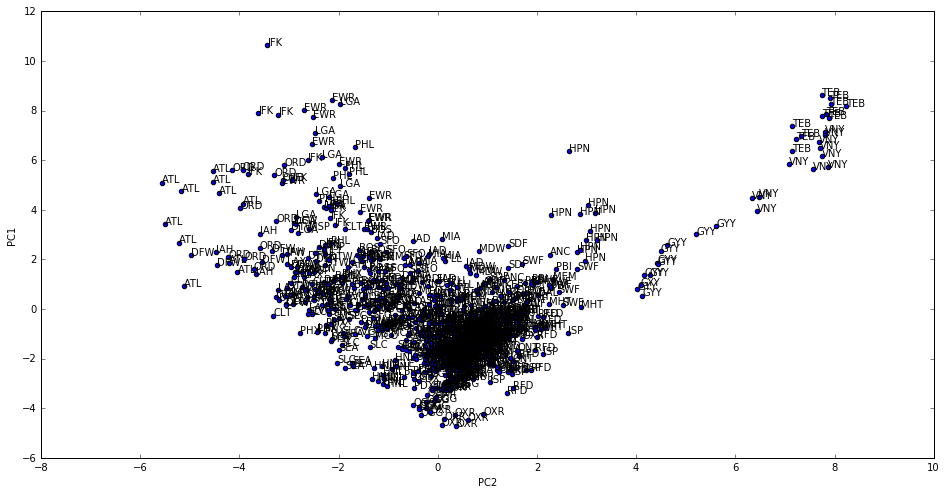

In [112]:
graph = airport_pca.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, airport in enumerate(airports['airport']):
    graph.annotate(airport, (airport_pca.iloc[i].PC2, airport_pca.iloc[i].PC1))

**What does the graph tell us?**

## Step 8: Cluster with K-Means

Set up the k-means clustering analysis. Use the graph from above to derive "k"

In [113]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(x)

Compute the labels and centroids

In [114]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [115]:
print(centroids)

[[  2.36514282e+05   2.35399046e+05   7.75831950e-01   6.78621577e-01
    7.69203734e-01   1.34294606e+01   1.80114523e+01   5.99892116e+00
    1.83762656e+01   3.70452282e+00   2.35643154e+00   3.86539419e+00]
 [  5.67404133e+04   5.65695283e+04   7.59414000e-01   7.28606333e-01
    7.48287333e-01   1.36144000e+01   1.19729833e+01   2.52395000e+00
    1.53959000e+01   2.60661667e+00   9.44200000e-01   3.11603333e+00]]


Compute the Silhoutte Score

In [116]:
metrics.silhouette_score(x, labels, metric='euclidean')

0.67002249577326389

Lastly, plot the new two-dimensional data along with their cluster assignments: 

In [117]:
airport_pca['cluster'] = pd.Series(clusters.labels_)

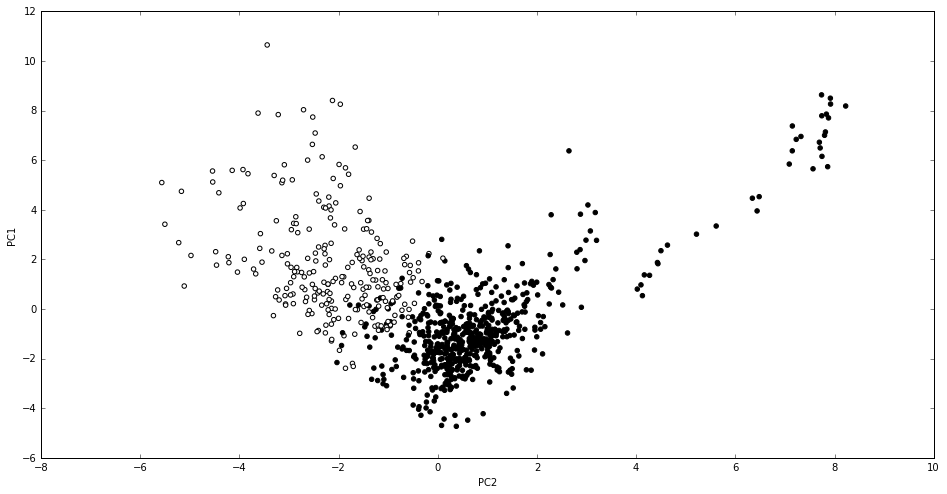

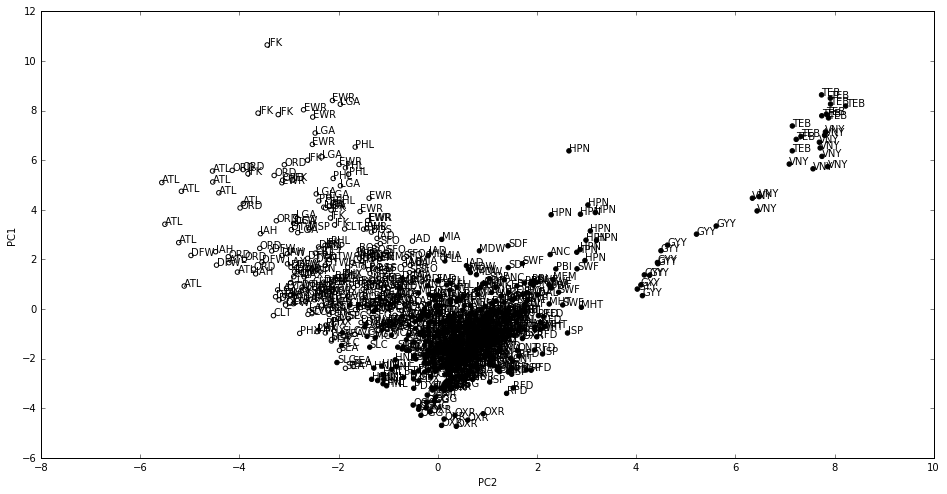

In [118]:
graph = airport_pca.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=airport_pca.cluster.astype(np.float), 
    figsize=(16,8))

graph2 = airport_pca.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=airport_pca.cluster.astype(np.float), 
    figsize=(16,8))

for i, airport in enumerate(airports['airport']):
    graph2.annotate(airport, (airport_pca.iloc[i].PC2, airport_pca.iloc[i].PC1))